## Importing Libraries

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

## Loading Data

In [55]:
data = pd.read_csv("pre_processed_data_with_top_comment_latest.csv")
print(data.shape)

flairs = ["Non-Political", "Scheduled", "AskIndia", "Science/Technology", "Politics",
          "Business/Finance", "Policy/Economy", "Sports", "Food"]

(2080, 7)


## Bar Graph for Number of Posts for each Flair

Number of Posts for each Flair


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


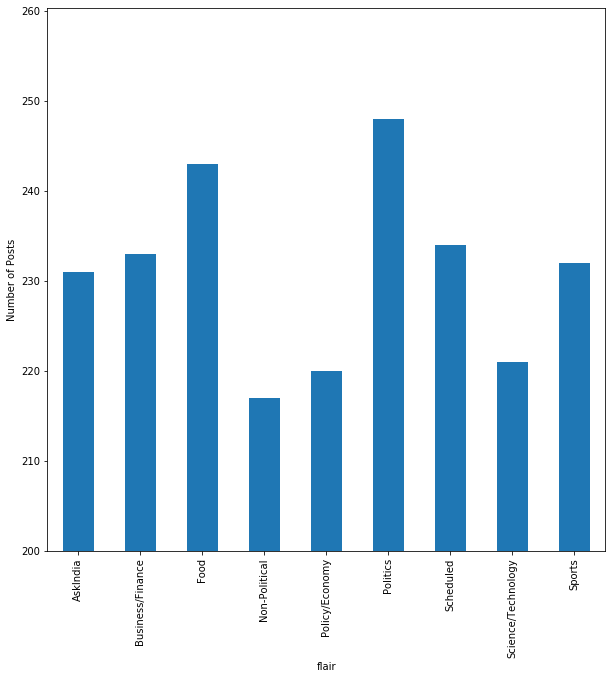

In [61]:
fig = plt.figure(figsize=(10,10))
data.groupby('flair').title.count().plot.bar(ylim=200)
print('Number of Posts for each Flair')
ax = fig.add_subplot(111)
ax.set_ylabel('Number of Posts')
plt.show()

#### The number of posts for each flair is pretty consistent, and the collected data is not skewed towards a particular flair

## Number of Posts with Nan Title

In [39]:
null_title = pd.isnull(data['title'])
print('Number of posts with Nan Title')
null_title.sum()

Number of posts with Nan Title


1

#### Almost all posts have a title, hence making it a suitable input for the detection of the flair. But it isn't compulsary for a flair to have a title, and hence, the title alone cannot be the only attribute for the detection of the flair. Inclusion of other attributes can help make a more robust model, especially in the case of an extremely small or Nan title. 

## Number of Posts with Nan Body

In [40]:
null_body = pd.isnull(data['body'])
print('Number of posts with Nan Body')
null_body.sum()

Number of posts with Nan Body


830

#### A significant portion (40%) of the posts do not have a body, hence it would be unwise to take the body alone as the attribute to predict the flair. Models for both cases, i.e., with and without body as an attribute are hence needed to gauge the effect of using body as an attribute for detection of the flair of the post.  

## Number of Posts with Nan Comments

In [41]:
null_comments = pd.isnull(data['comments'])
print('Number of posts with Nan Comments')
null_comments.sum()

Number of posts with Nan Comments


165

#### 8% of the posts do not have comments, hence comments alone cannot predict the flair of the post. But comments tend to provide a deeper insight on a topic, and hence should be used as an attribute for detection of the flair, if available. But at the same time, comments can also lead to dilution of the topic. To prevent this, only the top 3 top-level comments have been extracted from the commentforest sorted by "top".

## Distribution of Titles by Number of Words

Distribution of Titles by Number of Words


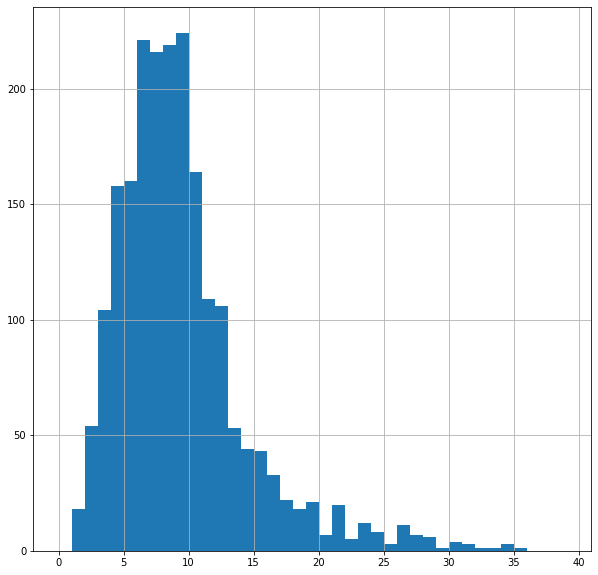

In [66]:
print('Distribution of Titles by Number of Words')
length = data["title"].apply(lambda x : len(str(x).split(' ')))
length.hist(figsize=(10,10), bins=np.arange(0,40,1))

#### As most titles are between 3 to 13 words in length, title alone doesn't contain enough data to train a robust model for flair detection.

## Distribution of Body by Number of Words

Distribution of Body by Number of Words


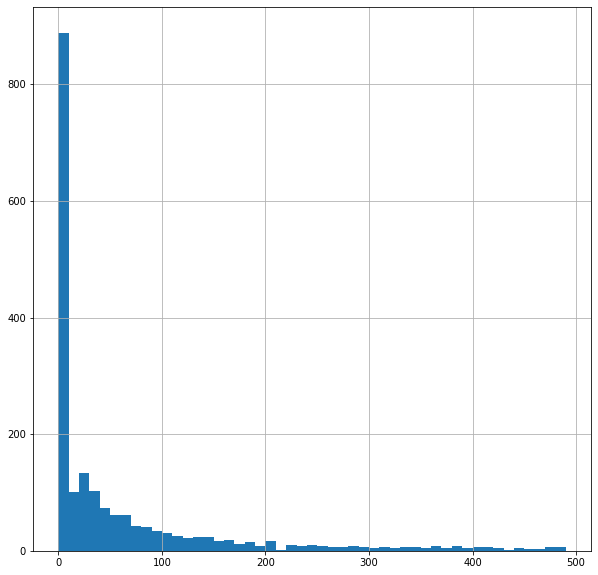

In [43]:
length=data['body'].apply(lambda x : len(str(x).split(' ')))
print('Distribution of Body by Number of Words')
length.hist(figsize=(10,10), bins=np.arange(0,500,10))

#### As most of the posts have a word count of the body less than 100, body alone doesn't contain enough data to train a robust model for flair detection.

## Distribution of Comments by Number of Words

Distribution of Comments by Number of Words


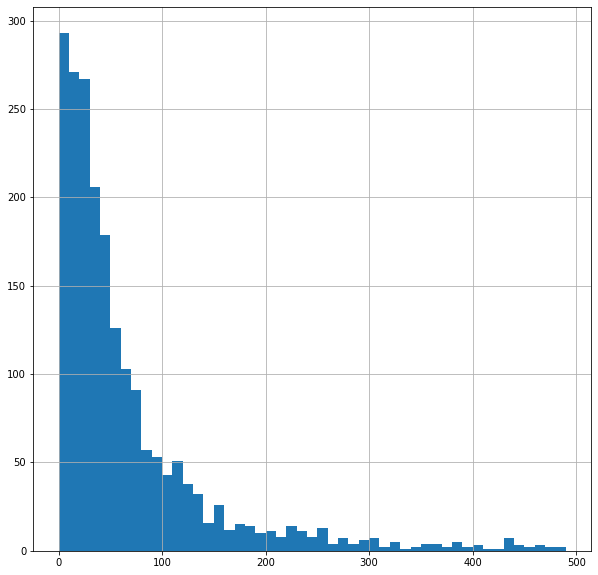

In [44]:
length=data['comments'].apply(lambda x : len(str(x).split(' ')))
print('Distribution of Comments by Number of Words')
length.hist(figsize=(10,10), bins=np.arange(0,500,10))

#### As a large chunk of the comments have a word count of less than 100 words, comments alone aren't sufficient to train a robust model for flair detection.

## Average Word Count of Title per Flair 

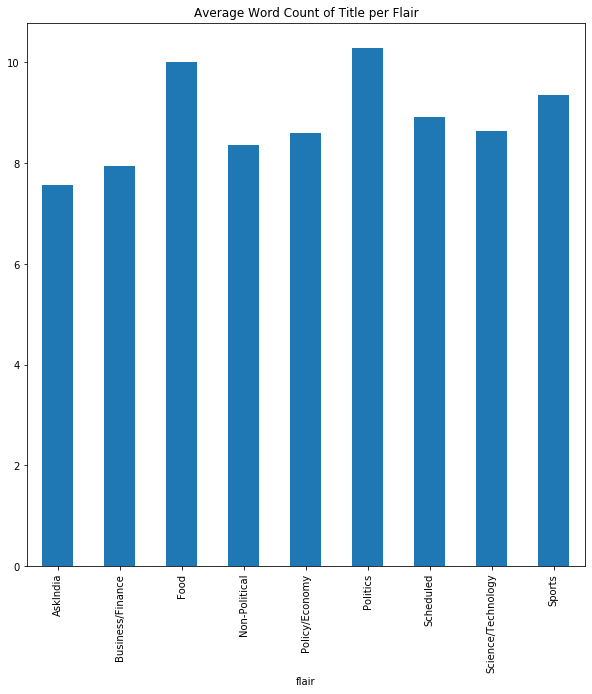

In [45]:
data['title_wc'] = data['title'].apply(lambda x : len(str(x).split(' ')))
avg_wc = data.groupby('flair').mean()
avg_wc.title_wc.plot(kind='bar',  figsize=(10,10), title= 'Average Word Count of Title per Flair')

#### Average word count for the title is pretty much consistent for each flair.

## Average Word Count of Body per Flair 

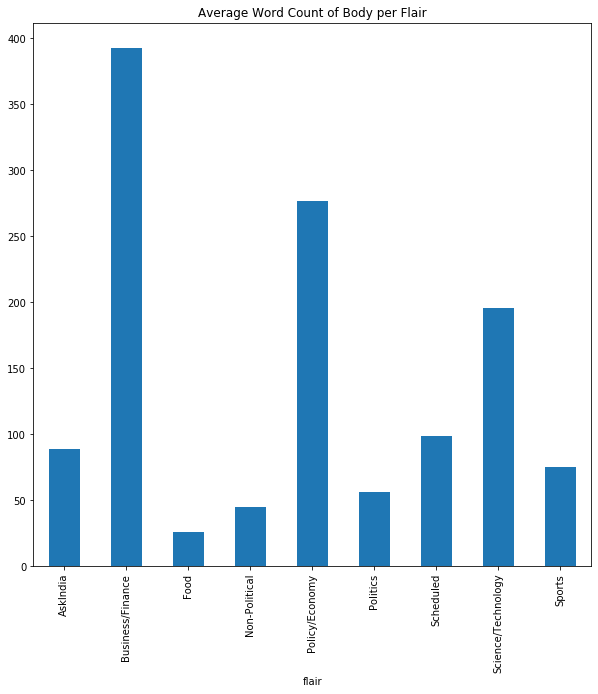

In [46]:
data['body_wc'] = data['body'].apply(lambda x : len(str(x).split(' ')))
avg_wc = data.groupby('flair').mean()
avg_wc.body_wc.plot(kind='bar',  figsize=(10,10), title= 'Average Word Count of Body per Flair')

#### Average Word Count of Body varies significantly for each flair. It is significantly higher for 'Business/Finance' and 'Policy/Economy', as compared to 'Food' and 'Non-Political'.

## Average Word Count of Comments per Flair 

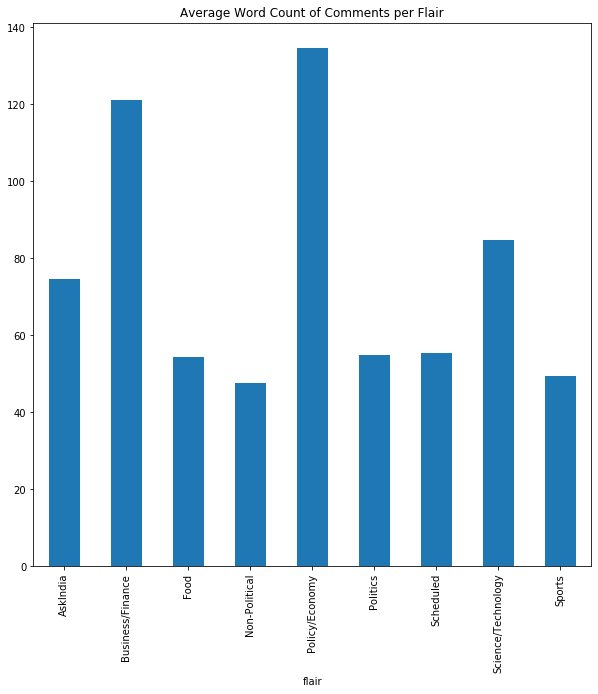

In [47]:
data['comment_wc'] = data['comments'].apply(lambda x : len(str(x).split(' ')))
avg_wc = data.groupby('flair').mean()
avg_wc.comment_wc.plot(kind='bar',  figsize=(10,10), title= 'Average Word Count of Comments per Flair')

#### Average Word Count of Comments varies significantly for each flair. It is significantly higher for 'Business/Finance' and 'Policy/Economy', as compared to 'Sports' and 'Non-Political'.

## Average Word Count of Title + Body + Comments per Flair 

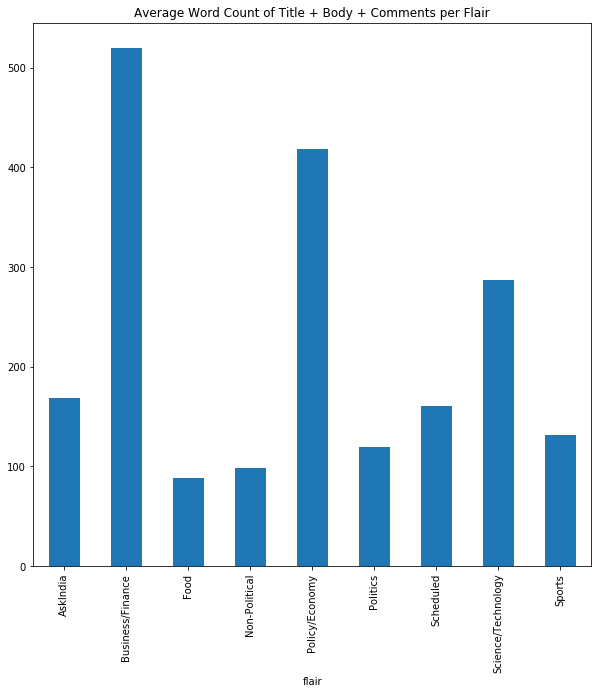

In [48]:
data['all_data'] = data['title'].fillna('') + data['body'].fillna('') + data['comments'].fillna('')
data['all_wc'] = data['all_data'].apply(lambda x : len(str(x).split(' ')))
avg_wc = data.groupby('flair').mean()
avg_wc.all_wc.plot(kind='bar',  figsize=(10,10), title= 'Average Word Count of Title + Body + Comments per Flair')

#### Average Word Count of Title + Body + Comments varies significantly for each flair. It is significantly higher for 'Business/Finance' and 'Policy/Economy', as compared to 'Food' and 'Non-Political'.

## Top Unigrams and their Frequency

india 4574
people 2297
indian 2076
like 2071
one 1936
would 1859
year 1772
time 1681
get 1677
government 1673
also 1640
even 1331
country 1211
state 1175
good 1164
make 1123
news 1082
company 1035
need 1034
business 1018


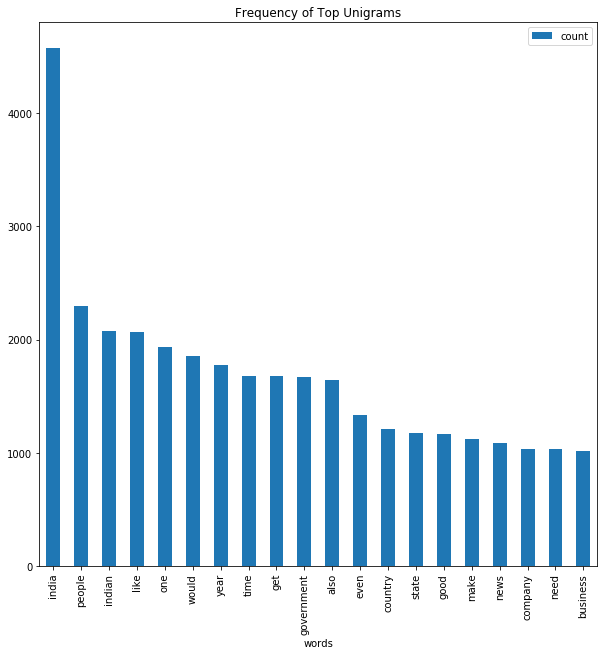

In [49]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['all_data'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['words' , 'count'])
df1.plot(x='words', y='count', kind='bar', title='Frequency of Top Unigrams',  figsize=(10,10))

## Top Bigrams and their Frequency

economictimes indiatimes 376
reddit india 271
last week 253
indiatimes news 242
india comment 212
science technology 196
indian economy 168
tech economictimes 159
real estate 153
per cent 140
prime minister 140
wikipedia org 124
org wiki 124
en wikipedia 123
timesofindia indiatimes 120
would like 113
political party 112
last year 111
reddit message 107
news startup 104


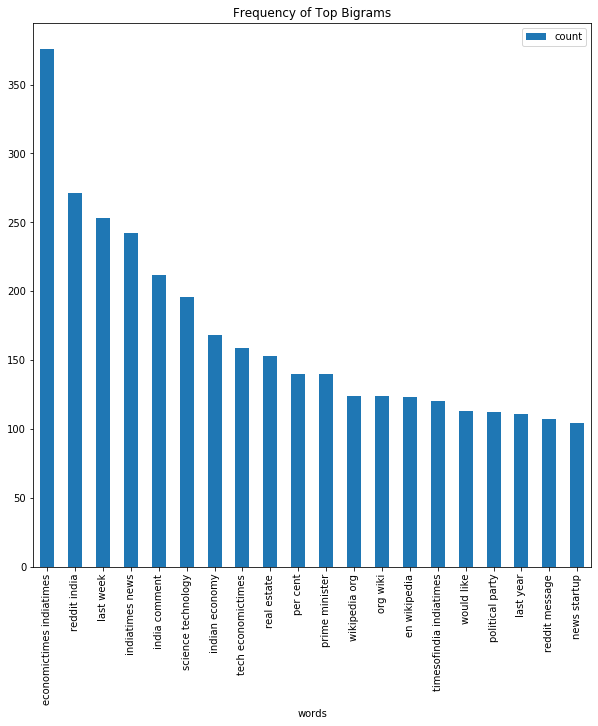

In [50]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['all_data'], 20)
for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['words' , 'count'])
df1.plot(x='words', y='count', kind='bar', title='Frequency of Top Bigrams',  figsize=(10,10))

## Frequency of Top Unigrams for Each Flair

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

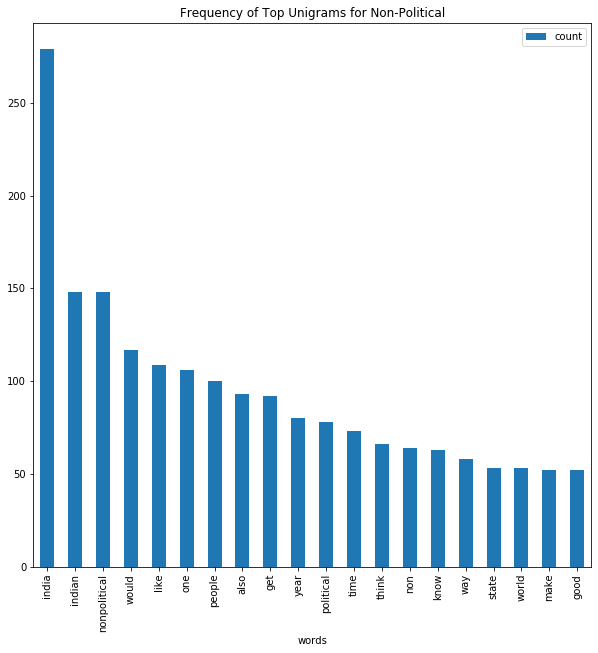

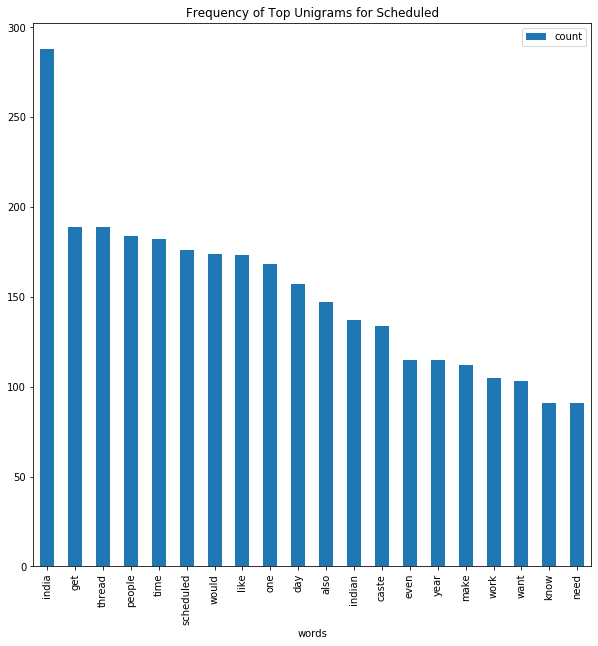

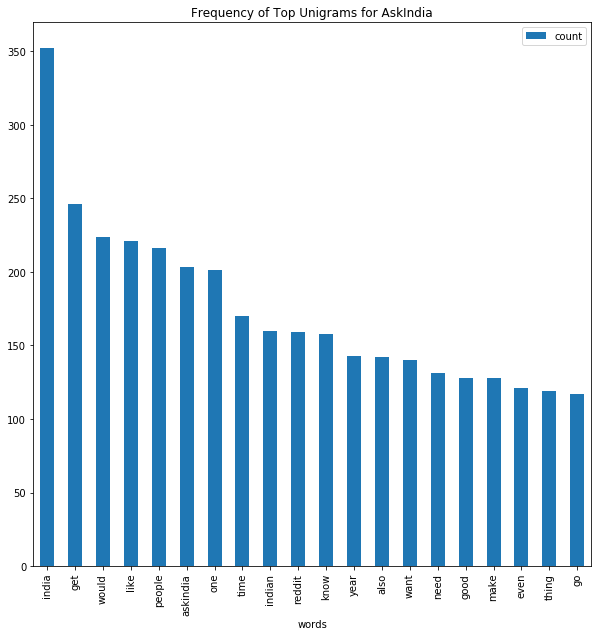

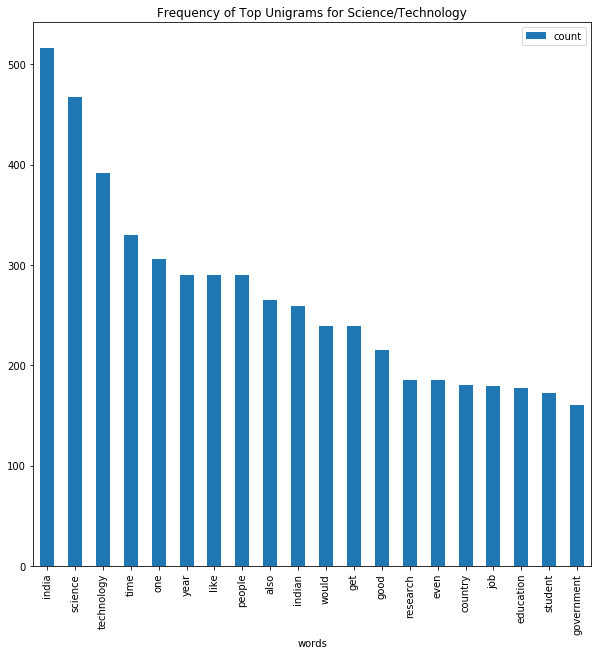

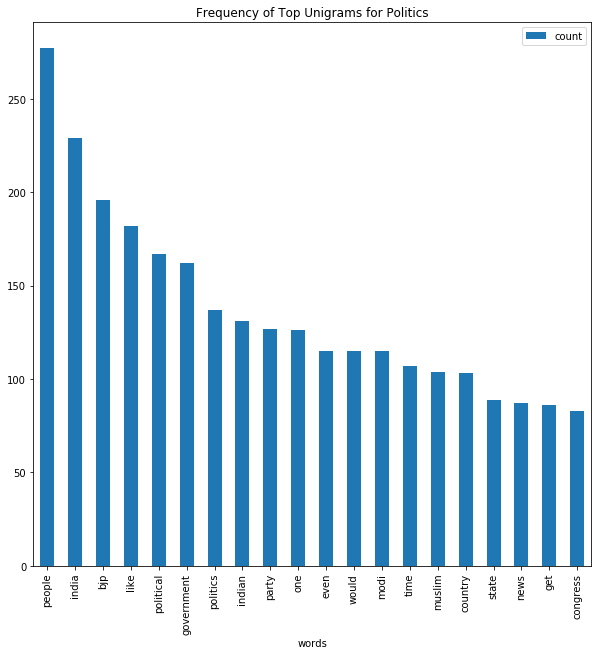

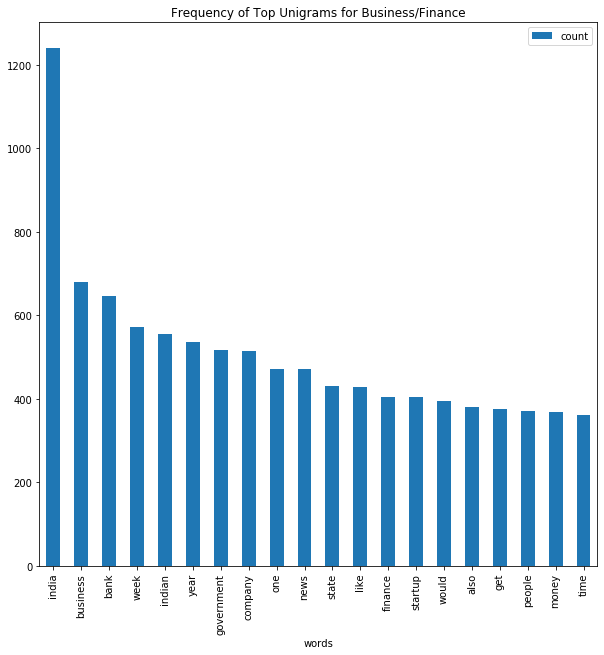

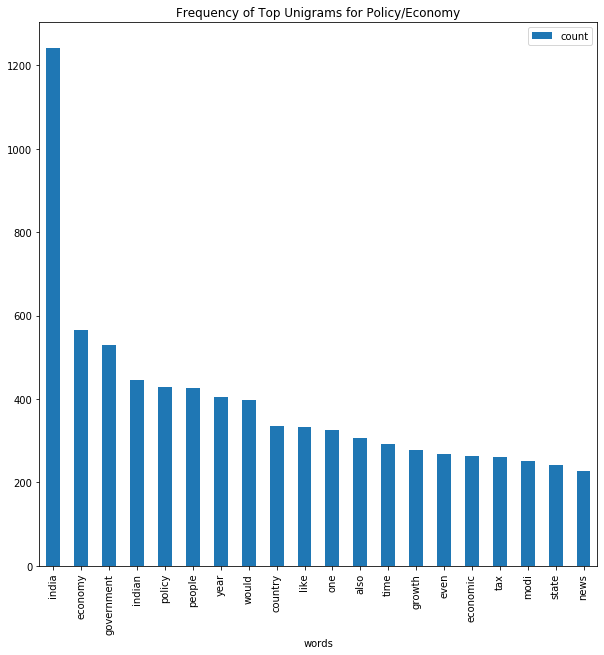

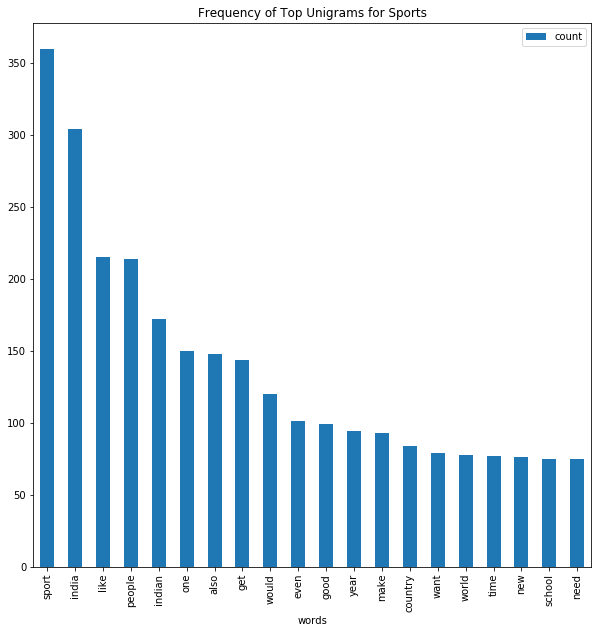

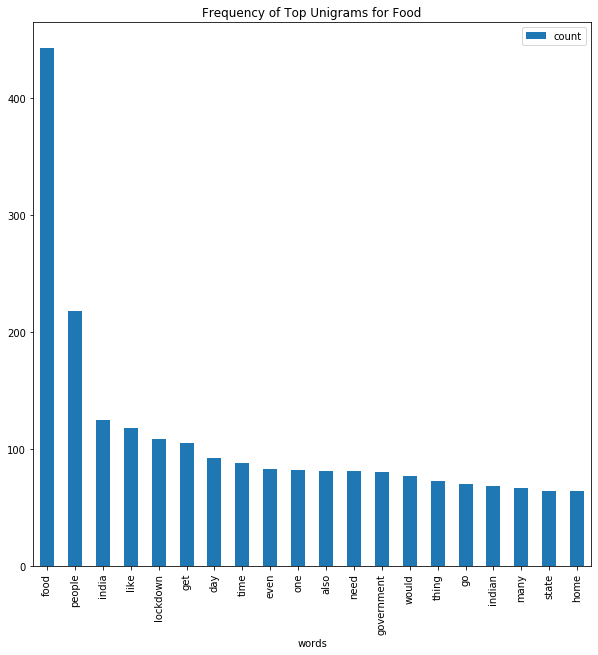

In [51]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for flair in flairs:
    data1 = data.loc[data['flair'] == flair]
    data1['all_data'] = data1['title'].fillna('') + data1['body'].fillna('') + data1['comments'].fillna('')
    common_words = get_top_n_words(data1['all_data'], 20)
    df1 = pd.DataFrame(common_words, columns = ['words' , 'count'])
    df1.plot(x='words', y='count', kind='bar', title='Frequency of Top Unigrams for ' + flair,  figsize=(10,10))

#### The above plots not only tell us what words consistently occur in the posts of the corresponding flairs, and how they are similar or different to posts of other flairs, but also help us understand the results achieved by the model. For example: a post consisting of multiple occurances of the terms "modi" and "government" can be classified into either "Politics" or "Policy/Economy" depending on the other words or phrases, but might be a suitable fit for both classes.

## Frequency of Top Unigrams for Each Flair

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

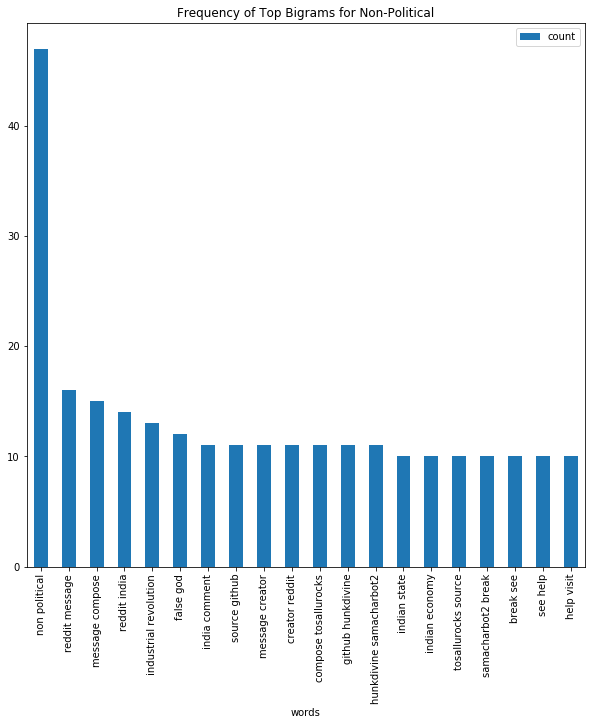

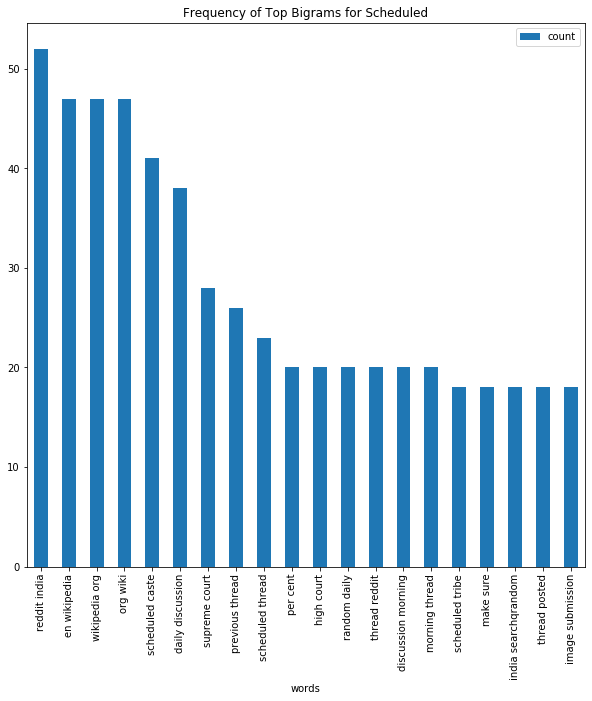

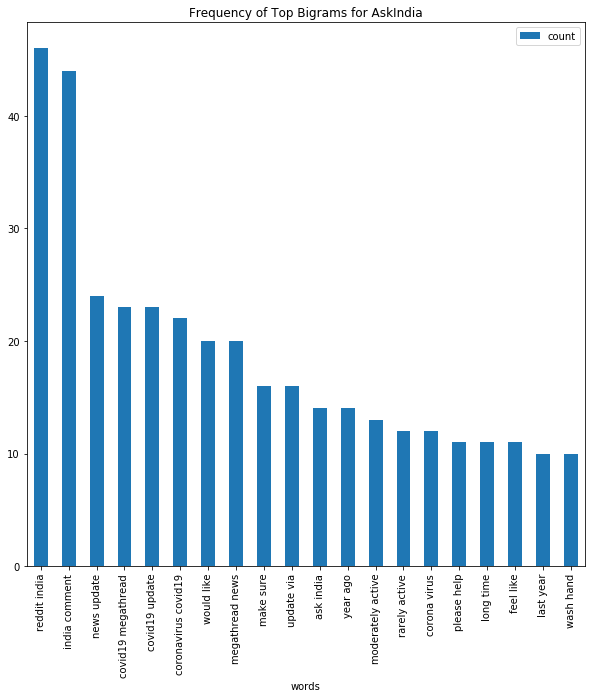

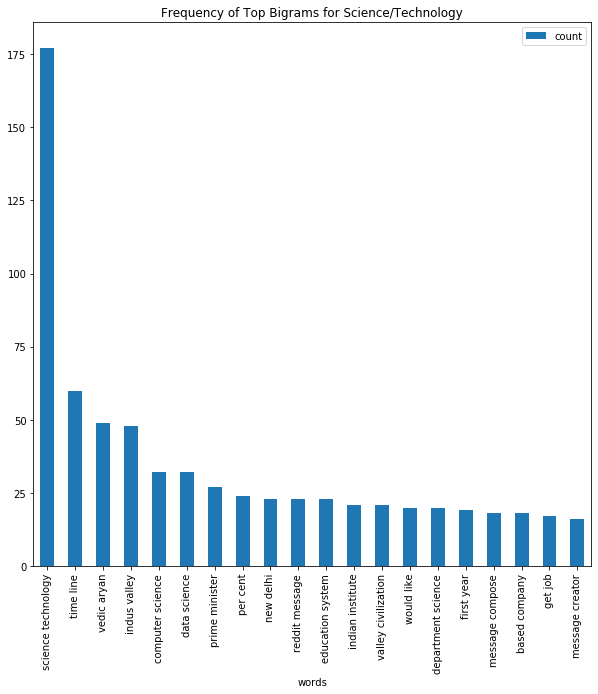

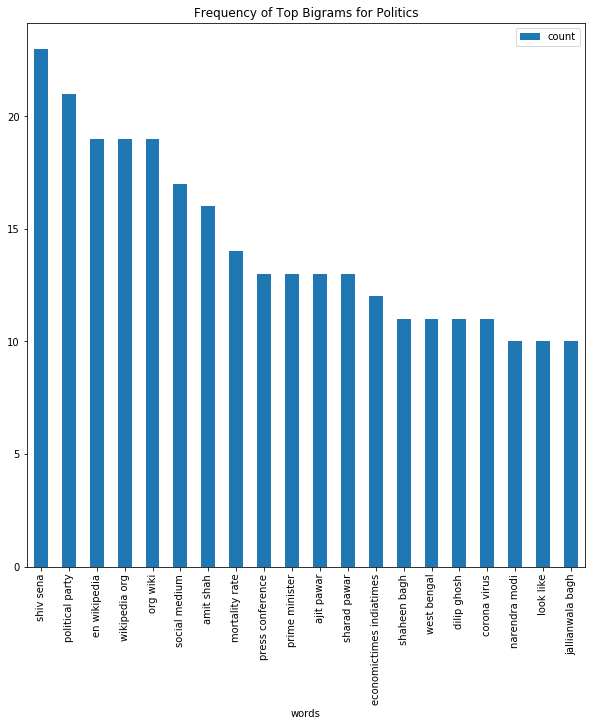

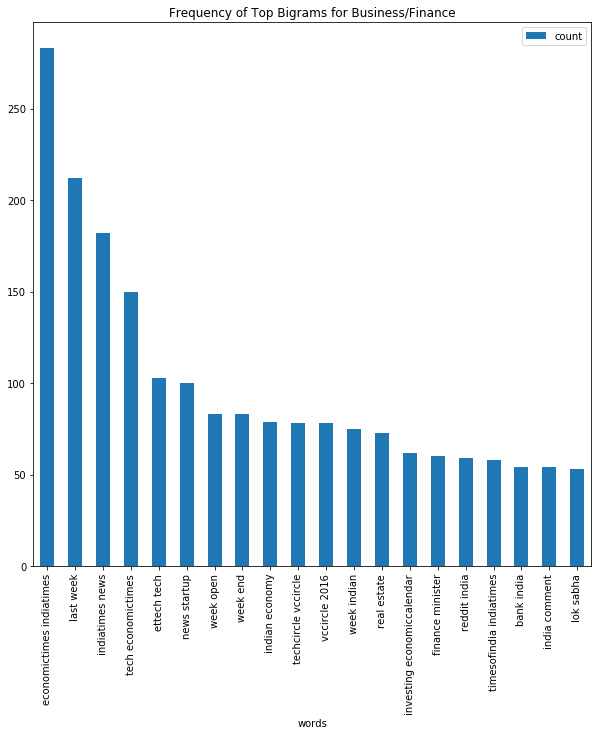

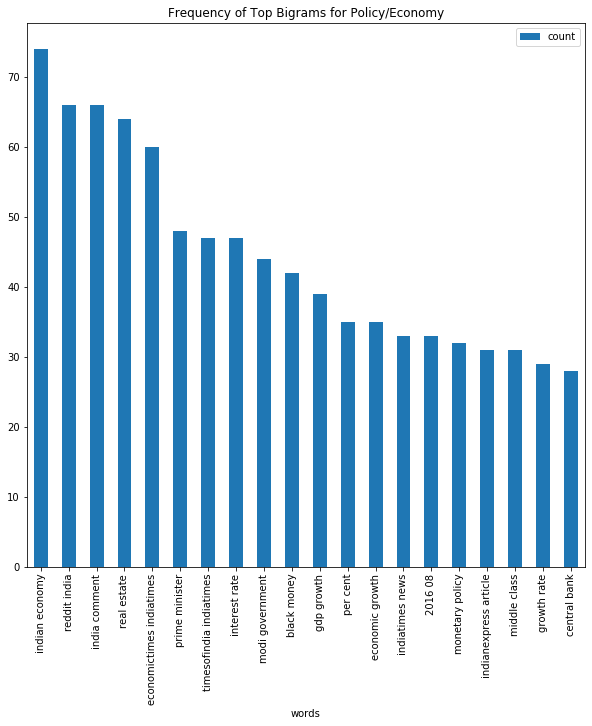

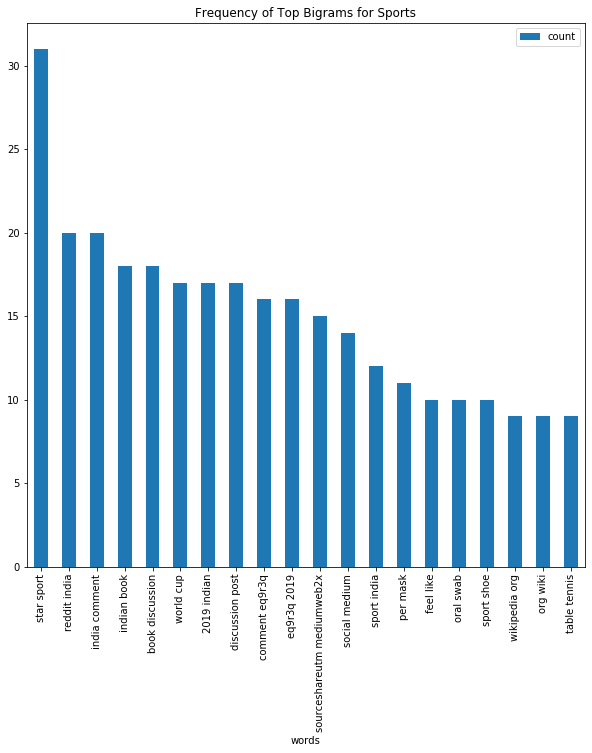

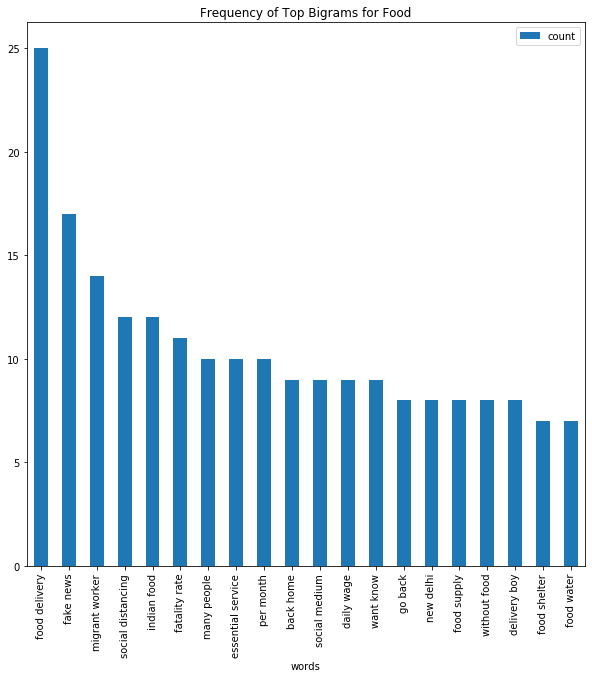

In [52]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

for flair in flairs:
    data1 = data.loc[data['flair'] == flair]
    data1['all_data'] = data1['title'].fillna('') + data1['body'].fillna('') + data1['comments'].fillna('')
    common_words = get_top_n_words(data1['all_data'], 20)
    df1 = pd.DataFrame(common_words, columns = ['words' , 'count'])
    df1.plot(x='words', y='count', kind='bar', title='Frequency of Top Bigrams for ' + flair,  figsize=(10,10))

#### The above plots not only tell us what phrases consistently occur in the posts of the corresponding flairs, and how they are similar or different to posts of other flairs, but also help us understand the results achieved by the model. For example: a post consisting of multiple occurances of the term "indian economy" can be classified into either "Business/Finance" or "Policy/Economy" depending on the other words or phrases, but might be a suitable fit for both classes.